# **Visualizing with Seaborn**



## What is Seaborn?

**Seaborn** is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn also provides multiple of color palette to enhance the visual quality: https://seaborn.pydata.org/tutorial/color_palettes.html

![](https://seaborn.pydata.org/_static/scatterplot_matrix_thumb.png)
![](https://seaborn.pydata.org/_static/errorband_lineplots_thumb.png)
![](https://seaborn.pydata.org/_static/scatterplot_sizes_thumb.png)

In [ ]:
import pandas as pd

# Import Seaborn
import seaborn as sns

## A Simple Plot




A visualization code by Seaborn would look like this. 

```
sns.barplot(data = dataframe,
            x = 'column_1',
            y = 'column_2')
```

This is used to plot a `bar chart`, using data from `dataframe`, with `column_1` as x, and `column_2` as y.


In [ ]:
# Load an example dataset
df = pd.read_csv('https://www.dropbox.com/s/zhxqmtf7fr3sabt/demographic_data.csv?dl=1')
df.head()

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


1/ [sns.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)


Visualize the distribution of the `Income Group`.


Since it is **one categorical column** and we concern about **distribution**. 

Countplot would be chosen.

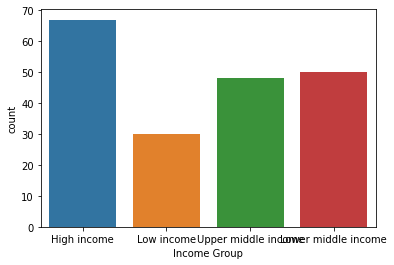

In [ ]:
sns.countplot(data=df,
              x='Income Group')

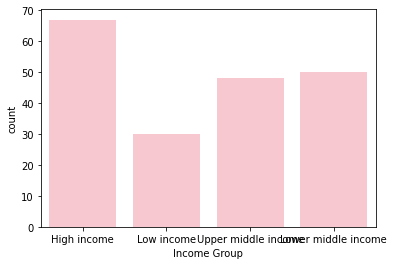

In [ ]:
# You can change the color of the bars by simple call `color`.
sns.countplot(data=df,
              x='Income Group',
              color='pink')

Color name in Seaborn

<img src="https://i.stack.imgur.com/lFZum.png" height=700>

2/ [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html)



Visualize the distribution of Internet rate to see which range of Internet rate is more common.

We are talking about **distribution** of **one continuous** column. There are two options for this tasks Histogram or Boxplot. However, we want to highlight **which range is more popular**. Histogram should be a better choice. 

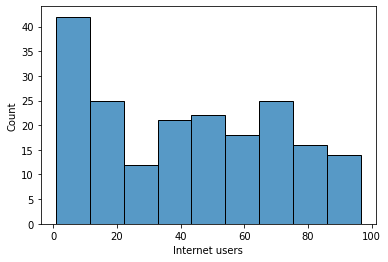

In [ ]:
sns.histplot(data=df,
             x='Internet users')

I recommend you to read more about Histogram at 

https://chartio.com/learn/charts/histogram-complete-guide/#choose-interpretable-bin-boundaries

3/ [sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Visualize the distribution of Internet rate to see if there is any countries have significant high or low Internet users rate. 

We are talking about **distribution** of **one continuous** column, and furthermore, focusing on **detecting** outliers. There is no better choice than Boxplot.

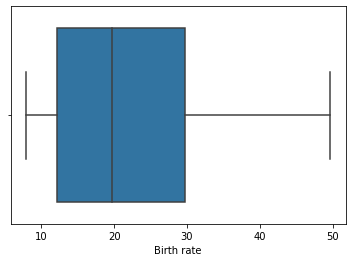

In [ ]:
# Visualize the distribution of Internet rate
sns.boxplot(data=df,
            x='Birth rate')

4/ [sns.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) 



Compare the average Internet users rate between income groups.

Since the task involves **comparison** and uses data from **2 column (1 continuous - Internet users, 1 categorical - Income group)**. Bar chart should be an appropriate choice.

In [ ]:
# Calculate the "mean" value of each category
# .reset_index to return "income group" as a column, not an index 
# so that we can specify the column name in the seaborn syntax later.

plot_data = df.groupby('Income Group')['Internet users'].mean().reset_index()
plot_data

,Income Group,Internet users
0,High income,74.231684
1,Low income,5.988333
2,Lower middle income,22.366386
3,Upper middle income,40.279577


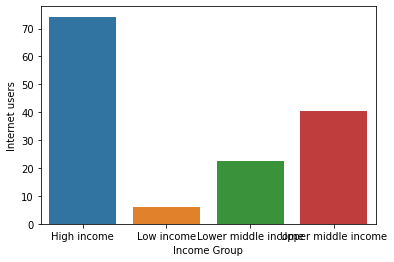

In [ ]:
sns.barplot(data=plot_data,
            x = 'Income Group',
            y = 'Internet users')

In [ ]:
# Plot the comparison between the median of birth rate between income groups.
plot_data = df.groupby('Income Group')['Birth rate'].median().reset_index()
plot_data

,Income Group,Birth rate
0,High income,11.3000
1,Low income,36.9275
2,Lower middle income,26.8950
3,Upper middle income,18.7795


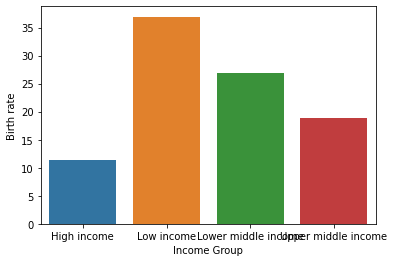

In [ ]:
sns.barplot(data=plot_data,
            x = 'Income Group',
            y = 'Birth rate')

When plotting a bar chart, one should consider if the bar should be sorted. There are two options:

- Sort by bars' values (metrics): Bar with highest value is plotted first.
    This is used when you want to highlight the most or the least regarding values of the bars.

- Sort by categories name (dimension): When your groups are ordinal. It means the categories are already sorted in its name. In this example: High income > Upper middle income > Lower middle income > Low income. The bar should be sorted following that fashion. 

In [ ]:
# To sort by values (metrics): You can sort from the plot_data. **Any change in the plot_data table will effect the plot in seaborn.**
plot_data = df.groupby('Income Group')['Internet users'].mean()
plot_data = plot_data.reset_index().sort_values(by='Internet users')
plot_data

,Income Group,Internet users
1,Low income,5.988333
2,Lower middle income,22.366386
3,Upper middle income,40.279577
0,High income,74.231684


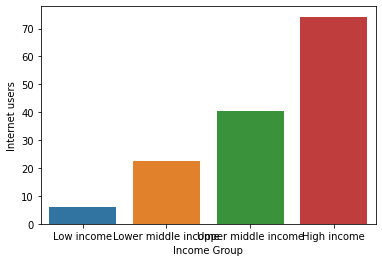

In [ ]:
sns.barplot(data=plot_data,
            x = 'Income Group',
            y = 'Internet users')

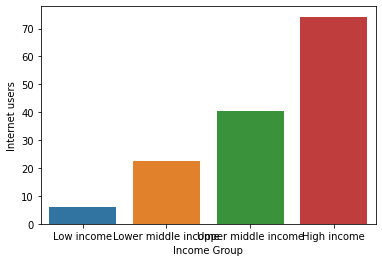

In [ ]:
# To sort categories (dimension): You can use `order` parameter in seaborn directly.
# Using `order` to sort by categories' names.
sns.barplot(data=plot_data,
            x = 'Income Group',
            y = 'Internet users',
            order=["Low income", "Lower middle income", "Upper middle income", "High income"])

In [ ]:
#  Order the bars in your Birth rate bar chart of previous task in order to high light the groups that have highest and lowest birth rate values.
plot_data = df.groupby('Income Group')['Birth rate'].median().reset_index()
plot_data

,Income Group,Birth rate
0,High income,11.3000
1,Low income,36.9275
2,Lower middle income,26.8950
3,Upper middle income,18.7795


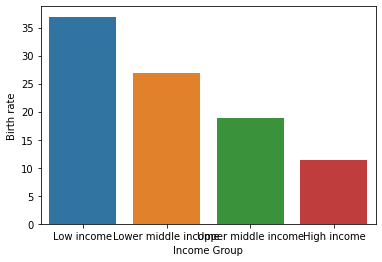

In [ ]:
sns.barplot(data=plot_data,
            x = 'Income Group',
            y = 'Birth rate',
            order=["Low income", "Lower middle income", "Upper middle income", "High income"])

5/ [sns.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)



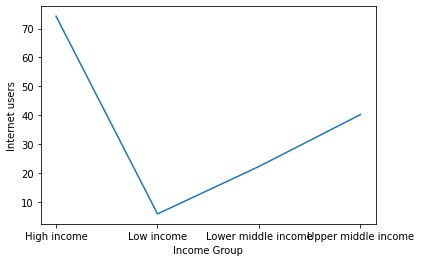

In [ ]:
# Line chart to compare average Internet users rate between Income Group

plot_data = df.groupby('Income Group').mean()[['Internet users']].reset_index()
sns.lineplot(data=plot_data, 
             x='Income Group', 
             y='Internet users')

❗️ **Notice**: There is no `order` parameter in lineplot. If you want the change the order, you have to change in the plotting data.

6/ [sns.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)



**Task:** Is there any relation between `Birth rate` and `Income group`?

The chart concerns about **relation** and uses data from **2 continuous columns**. Scatterplot is a good choice. 

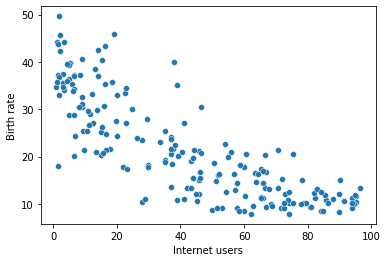

In [ ]:
 sns.scatterplot(data=df,
                x='Internet users',
                y='Birth rate')

Here we can observe that countries with higher birth rate tend to have lower internet users rate. The two columns are negatively correlated. 

Scatterplot is a good visualization method to quickly see if the two variables are correlated to each other. We will learn how to further quantify this observation in the Correlation and Heatmap lecture.

One way to analyse this scatter chart further is to add a **breakdown** dimension by using `hue`.

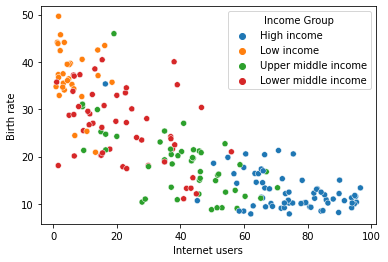

In [ ]:
 sns.scatterplot(data=df,
                x='Internet users',
                y='Birth rate',
                 hue='Income Group')

7/ [Extra] sns.pairplot

To quickly plot the distribution of one variable and its correlation to other columns as a pair. This function takes an extreme amount of time to run. So beware.  

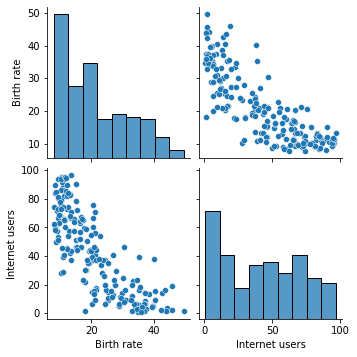

In [ ]:
sns.pairplot(df)

# VISUALIZING WITH MATPLOTLIB
<img src="https://matplotlib.org/_static/logo2.png" alt="matplotlib" width="50%"/>

Matplotlib is a package for data visualization in Python. The library is built on NumPy arrays, and designed to work with the broader SciPy stack.

One of Matplotlib’s most important features is its **ability to play well with many operating systems and graphics backends**. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib. It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

Matplotlib is  designed to help users to visualize data as easily as possible, with all the necessary control -- that is, by using relatively high-level commands most of the time, and still have the ability to use the low-level commands when needed.

Therefore, everything in matplotlib is organized in a hierarchy. At the top of the hierarchy is the matplotlib "state-machine environment" which is provided by the [`matplotlib.pyplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) module. At this level, simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like **MATLAB**. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

<img src='https://i.imgur.com/O4mBgbJ.png'>

In [1]:
# Import matplotlib pyplot

import matplotlib.pyplot as plt

In [2]:
# Import other libraries

import pandas as pd
import seaborn as sns

In [3]:
# Load data 

df = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Multiple Subplots

During the process of visualizing data, Matplotlib will first innitiate a figure. This figure serves as a canvas, on which subplots (axes) will be drawn. 

❗️ Notice that, we do not draw directly onto the figure, but on subplots. 

❗️ By default, one figure with one subplot will be created if there is no instruction on layout given. 

<img src='https://i.imgur.com/AaqxaKy.png' width=600>

In [4]:
# Notice that the syntax of matplotlib is executed top down. User has to create a figure first, before drawing a chart and then `plt.show` to display all the open figures.
# `plt.figure` also allows users to adjust the size with specific width and height measurements in inches. 

# Create a blank figure
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

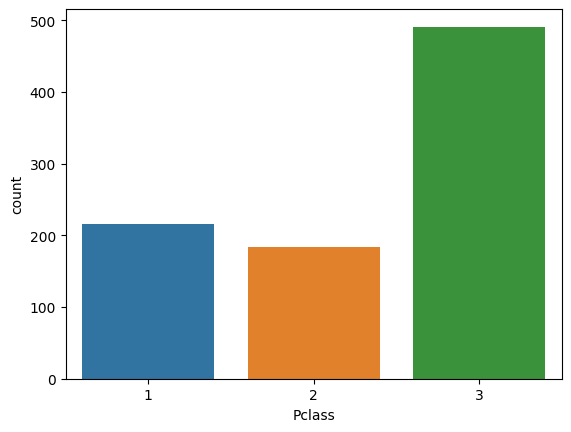

In [5]:
# Create a figure with one subplot by default 
# And draw on it

plt.figure() # create blank figure
sns.countplot(data=df, x='Pclass')  # create subplot into figure
plt.show()

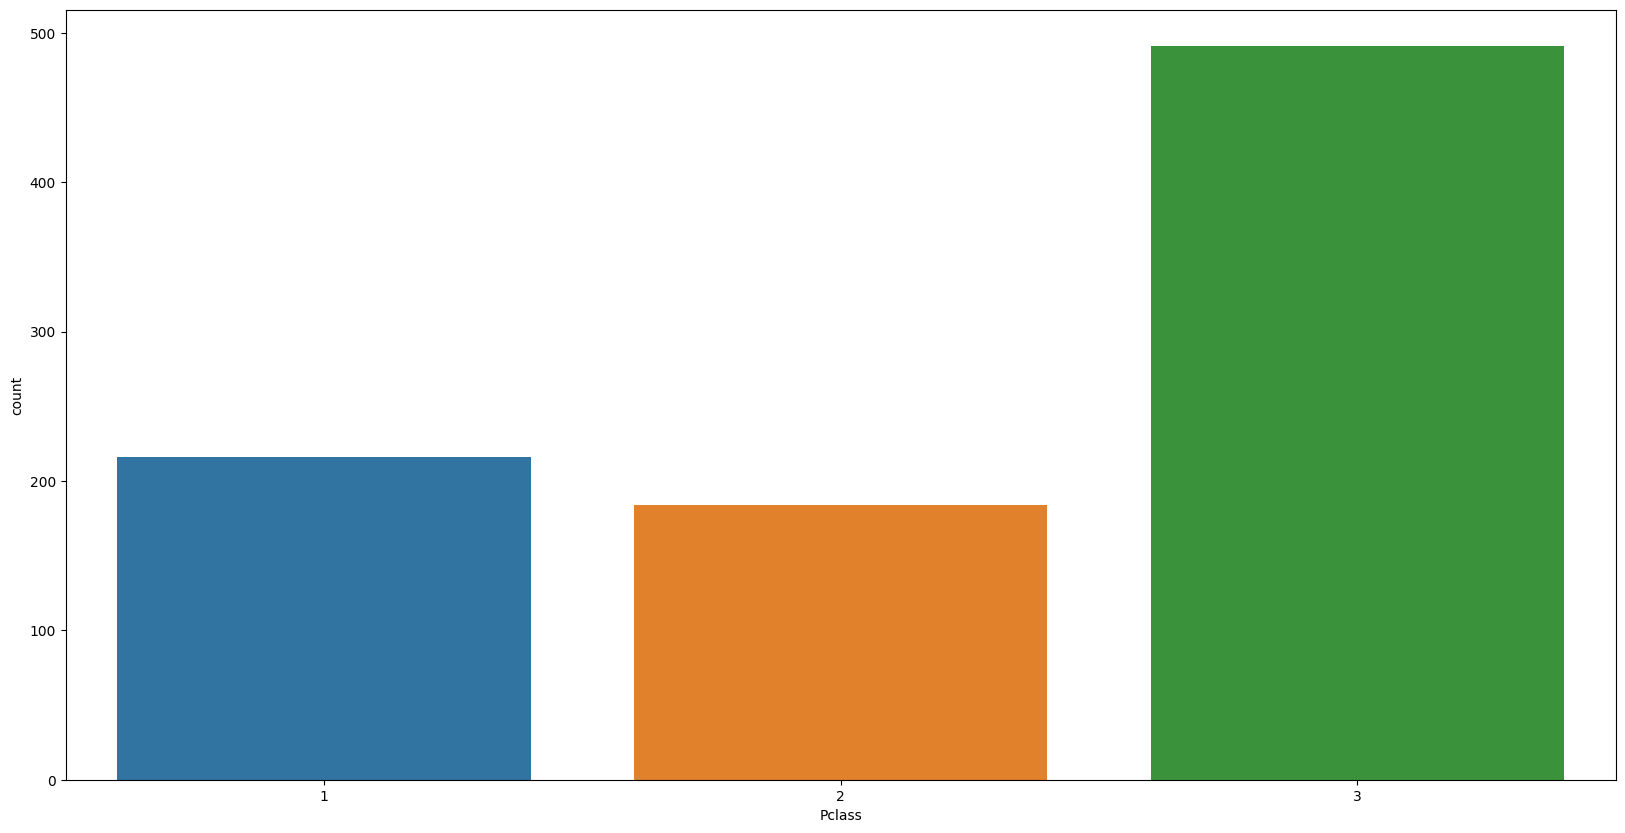

In [6]:
# Make the figure larger
# by inches 

plt.figure(figsize=(20, 10))  #(width, height)in inches
sns.countplot(data=df, x='Pclass')
plt.show()

To create multiple subplots in a figure, simply use `plt.subplot`. The syntax allows users to specify the layout with 

- number of rows
- number of columns 
- index of the drawing chart (count from 1)

For example:

<img src='https://i.imgur.com/MXKt1jC.png'>

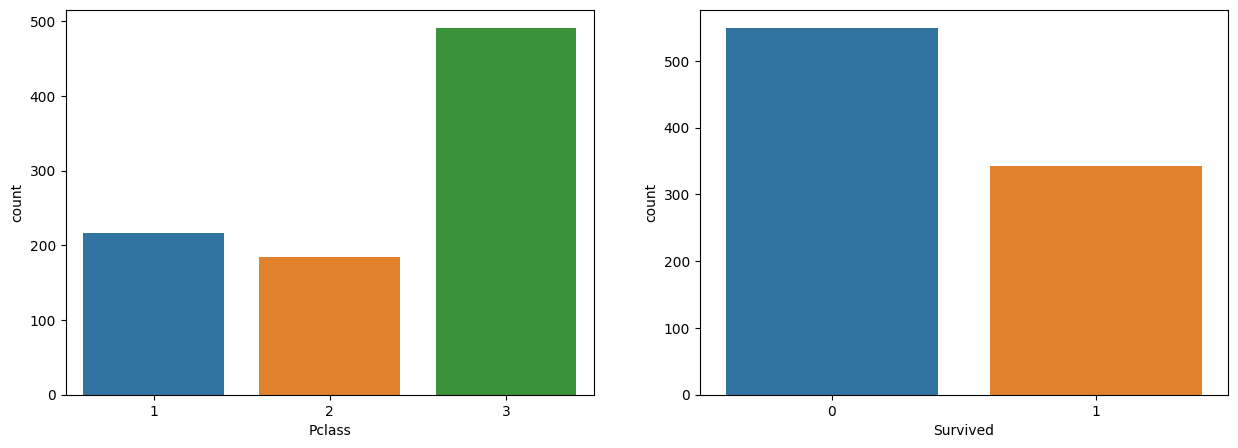

In [7]:
# Innitiate a figure
plt.figure(figsize=(15, 5))

# Point to the first subplot 
# First subplot is in the layout of 1 row, 2 columns, first slot. 
plt.subplot(121)  #vị trí của sublot: số dòng-số cột của tất cả số sublot muốn tạo cho figure-vị trí của chính sublot này
sns.countplot(data=df, x='Pclass')

# Point to the first subplot 
# Second subplot is in the layout of 1 row, 2 columns, second slot. 
plt.subplot(122)  #nếu có hơn 9 sublot thì tách bằng dấu phẩy, vd(4,3,10)
sns.countplot(data=df, x='Survived')

plt.show()

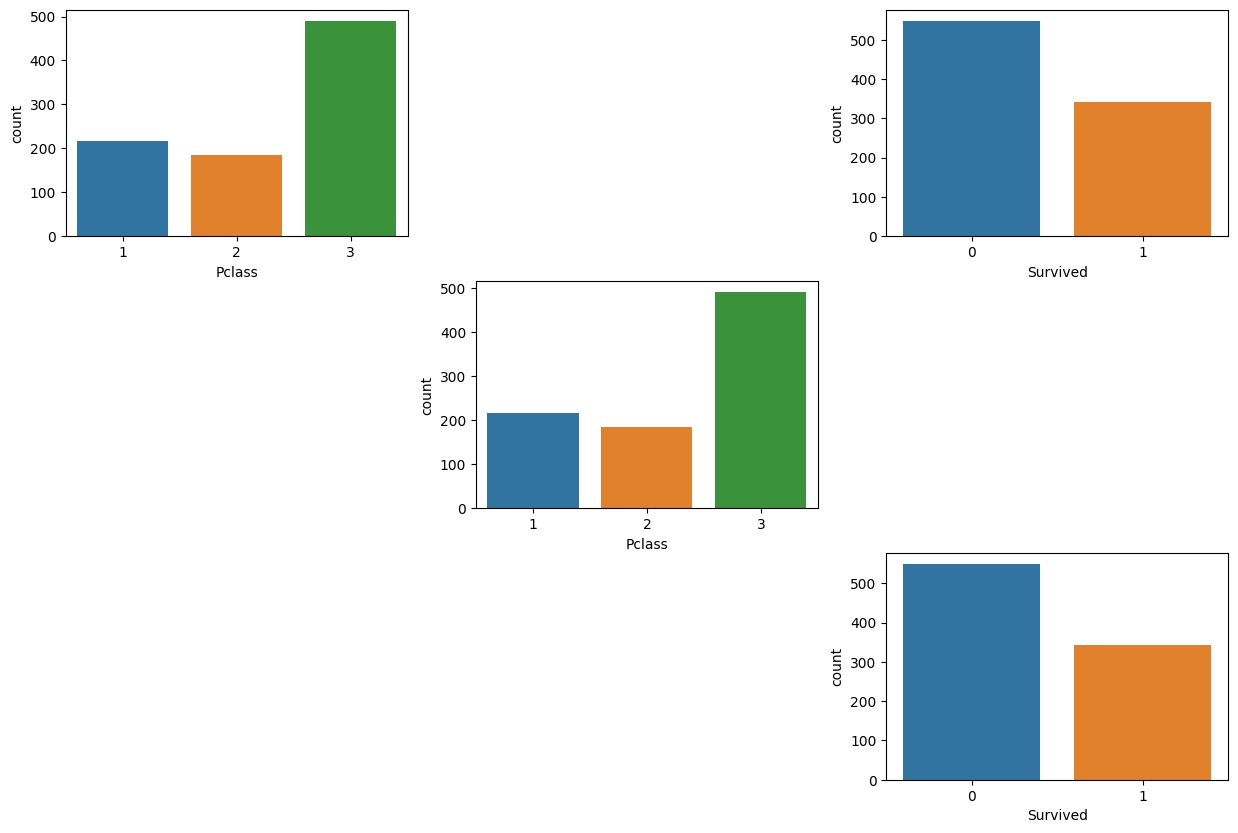

In [9]:
#Recreate the below visualization layout with charts as countplots of Pclass and Survived.

# Innitiate a figure
plt.figure(figsize=(15, 10))

# Point to the 1st subplot 
# First subplot is in the layout of 3 rows, 3 columns, first slot. 
plt.subplot(331)
sns.countplot(data=df, x='Pclass')

# Point to the 3rd subplot 
# The subplot is in the layout of 3 rows, 3 columns, 3rd slot. 
plt.subplot(333)
sns.countplot(data=df, x='Survived')

# Point to the 5th subplot 
# The subplot is in the layout of 3 rows, 3 columns, 5th slot. 
plt.subplot(335)
sns.countplot(data=df, x='Pclass')

# Point to the 9th subplot 
# The subplot is in the layout of 3 rows, 3 columns, 9th slot. 
plt.subplot(339)
sns.countplot(data=df, x='Survived')

plt.show()
# The syntax in matplotlib in hierachy. Anything that is written under a subplot call will be drawn on that subplot. 

In [10]:
mean_fare_by_survived = df.groupby('Survived')['Fare'].mean().reset_index()
mean_fare_by_survived 

,Survived,Fare
0,0,22.117887
1,1,48.395408


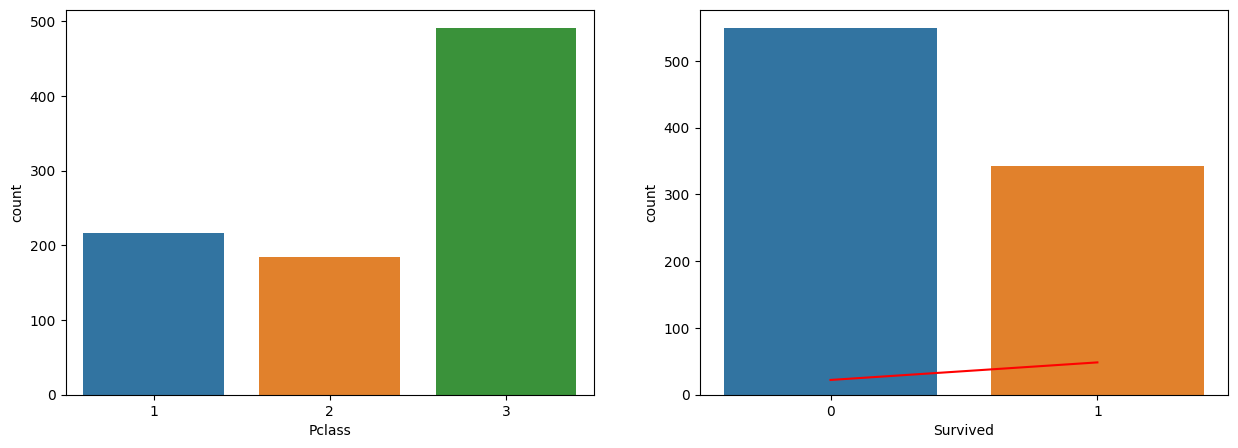

In [11]:
plt.figure(figsize=(15, 5))

# Specify first subplot
plt.subplot(121)
sns.countplot(data=df, x='Pclass')

# 2nd subplot will have both countplot and lineplot
# Because both are specified under subplot 122
plt.subplot(122)
sns.countplot(data=df, x='Survived')
sns.lineplot(data=mean_fare_by_survived, x='Survived', y='Fare', color='red')

plt.show()

In case we have multiple charts on one subplot, it's important to split the metrics into dual axis. For that task, we can use 
- `plt.twinx()` to create dual vertical axis.
- `plt.twiny()` to create dual horizontal axis. 

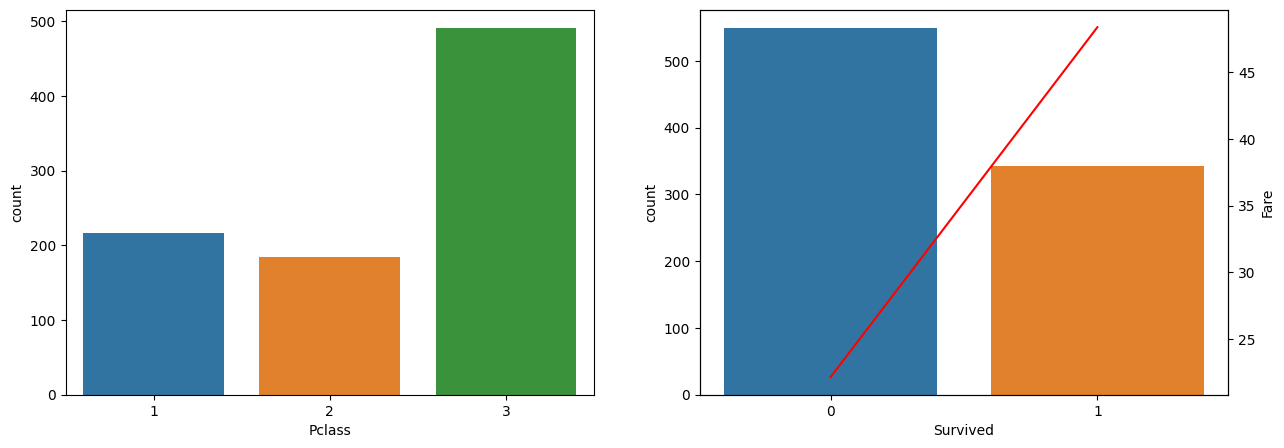

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.countplot(data=df, x='Pclass')

# Simply place the twinx between two charts.
# Notice how the line changes because the scale of axis is changed.
plt.subplot(122)
sns.countplot(data=df, x='Survived')
plt.twinx()
sns.lineplot(data=mean_fare_by_survived, x='Survived', y='Fare', color='red')

plt.show()

While dealing with multiple subplots, we need different titles to distinguish them. Users can choose between:

- `plt.suptitle`: To name the entire figure
- `plt.title`: To name a subplot

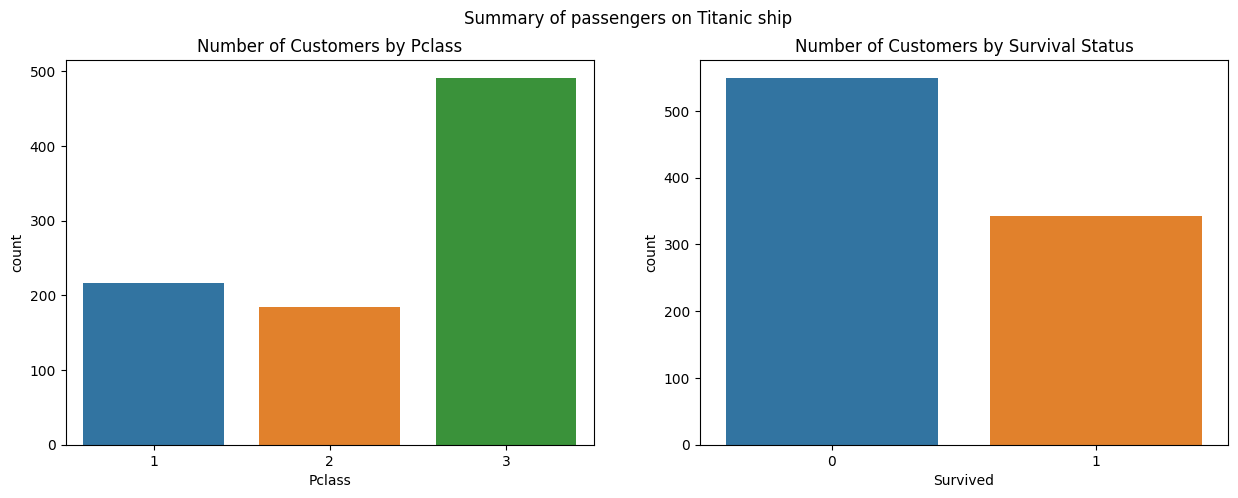

In [13]:
plt.figure(figsize=(15, 5))
plt.suptitle('Summary of passengers on Titanic ship')

plt.subplot(121)
sns.countplot(data=df, x='Pclass')
plt.title('Number of Customers by Pclass')

plt.subplot(122)
sns.countplot(data=df, x='Survived')
plt.title('Number of Customers by Survival Status')

plt.show()

Now, we are able to create a visualization with multiple subplots. A quick summary:

👉 To create figure and subplots:

```plt.figure()``` ▸ https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

```plt.subplot()``` ▸ https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

👉 To create dual axis:

`plt.twinx()`

`plt.twiny()`

👉 To add title:

```plt.suptitle()``` ▸ https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

```plt.title()``` ▸ https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html

## 2. Customize a Chart

<img src="https://matplotlib.org/_images/anatomy.png" alt="drawing" width="600">

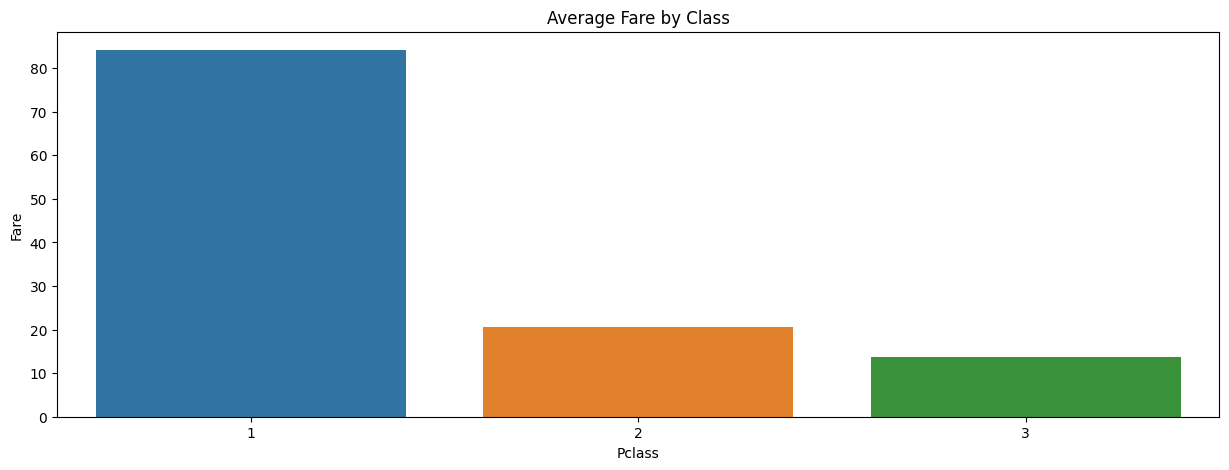

In [14]:
# Visualizing average fare by Pclass 

# Calculate the plot data
mean_fare_by_pclass = df.groupby('Pclass')['Fare'].mean().reset_index()

# Visualize 
plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass,
            x='Pclass',
            y='Fare')

# Customize
plt.title('Average Fare by Class')

plt.show()

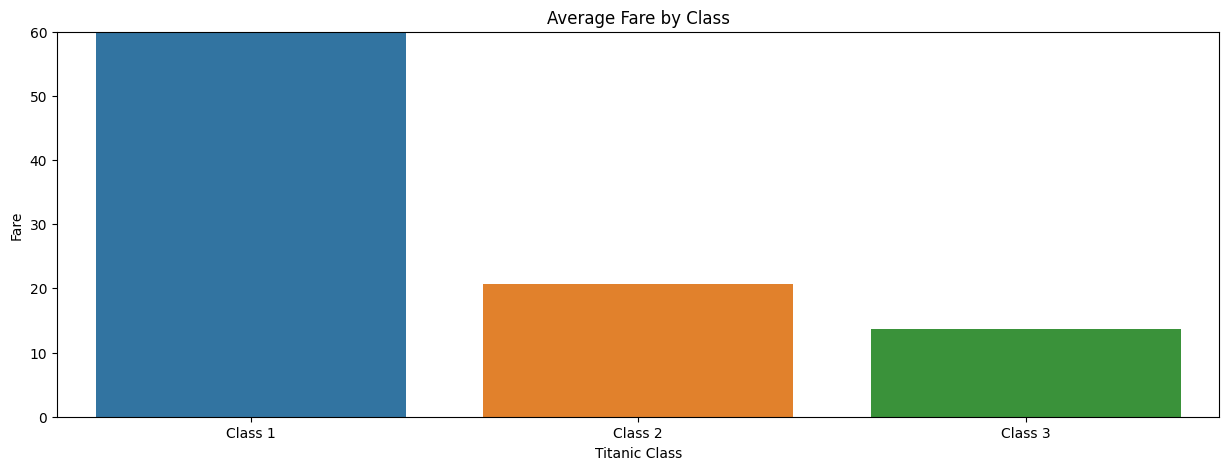

In [15]:
# Customize the chart
plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass,
            x='Pclass',
            y='Fare')

plt.title('Average Fare by Class')

# ------ Change label of x-axis ------
plt.xlabel('Titanic Class')

# ------ Change ticks of x-axis ------
# ticks: specify index of ticks (count from 0)
# labels: new labels for the ticks
plt.xticks(ticks=[0, 1, 2],  # có thể tủy chỉnh chọn rename cho bất cứ cột nào
           labels=['Class 1', 'Class 2', 'Class 3'])

# ------ Change limit of y-axis ------
# The new y-axis ranges from 0 to 60
plt.ylim(0, 60)

plt.show()

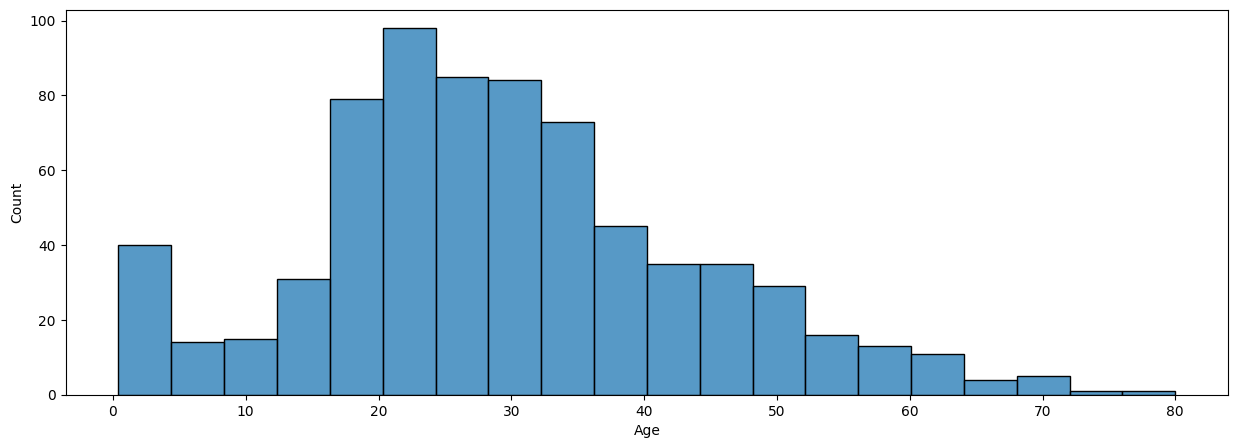

In [16]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='Age')
plt.show()

In [17]:
list(range(0, 85, 5))

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

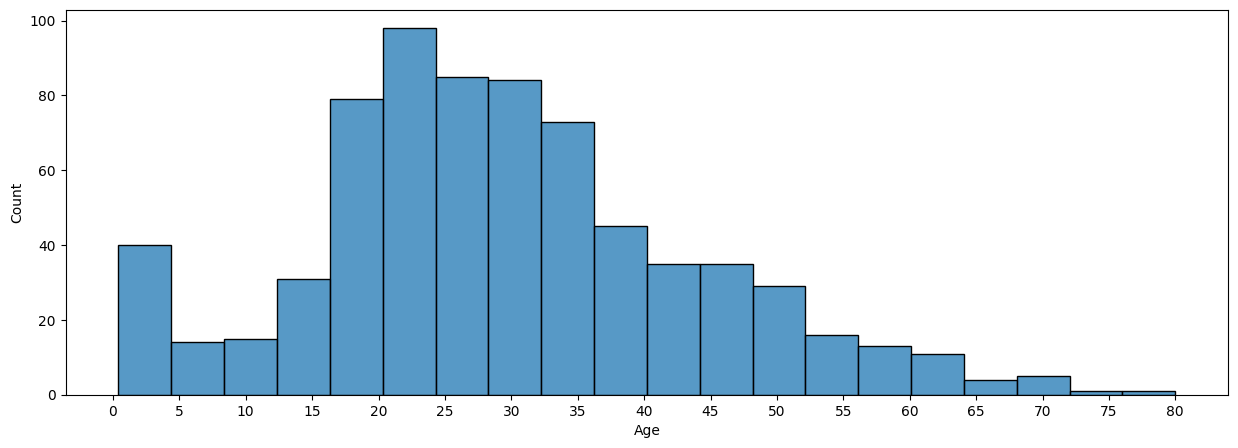

In [18]:
# Example 2: Adjust labels for continuous axis

plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='Age')
plt.xticks(ticks=list(range(0, 85, 5))) # thay đổi range các cột biểu diễn

plt.show()

## 3. Add Text

Oftentimes, we want to introduce text to chart as tooltips to explain the chart better. Matplotlib has the `plt.text` syntax that offers a very flexible way to edit the text. 
Some important parameters:

- `x`: x location
- `y`: y location
- `s`: message in string
- `horizontalalignment` or `ha`: "center", "right", or "left"
- `verticalalignment` or `va`: 'center', 'top', 'bottom', 'baseline', 'center_baseline'
- Furthermore, any other formatting parameter can be passed in as a dictionary. Please refer in the link ▸ [```plt.text( )```](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) 

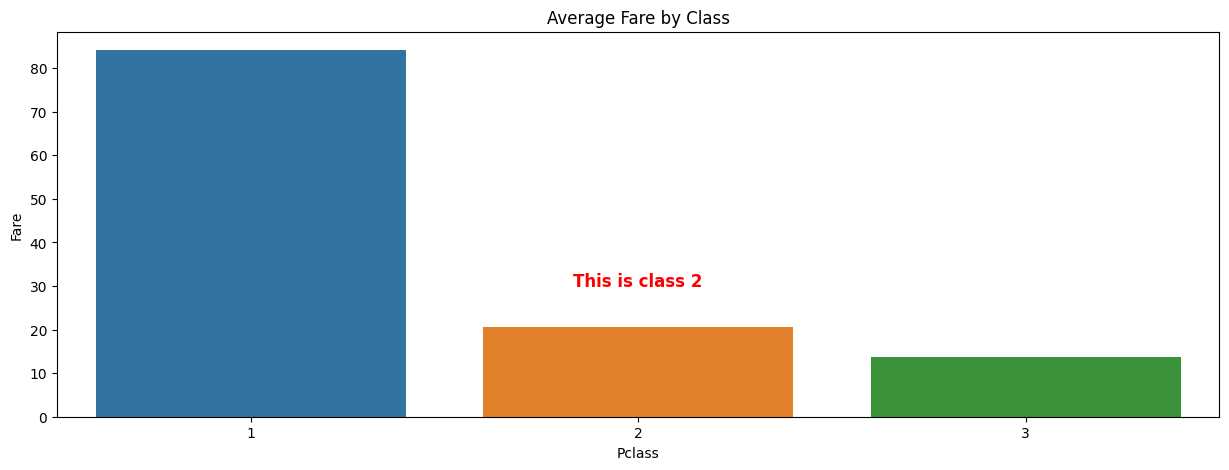

In [19]:
mean_fare_by_pclass = df.groupby('Pclass')['Fare'].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass,
            x='Pclass',
            y='Fare')
plt.title('Average Fare by Class')


# ----- Add Text -----
plt.text(x=1, #vị trí tại trục x theo index
         y=30, 
         s='This is class 2', 
         ha='center',
         fontsize='large', 
         fontweight='bold', 
         color='red')

plt.show()

In [20]:
mean_fare_by_pclass

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


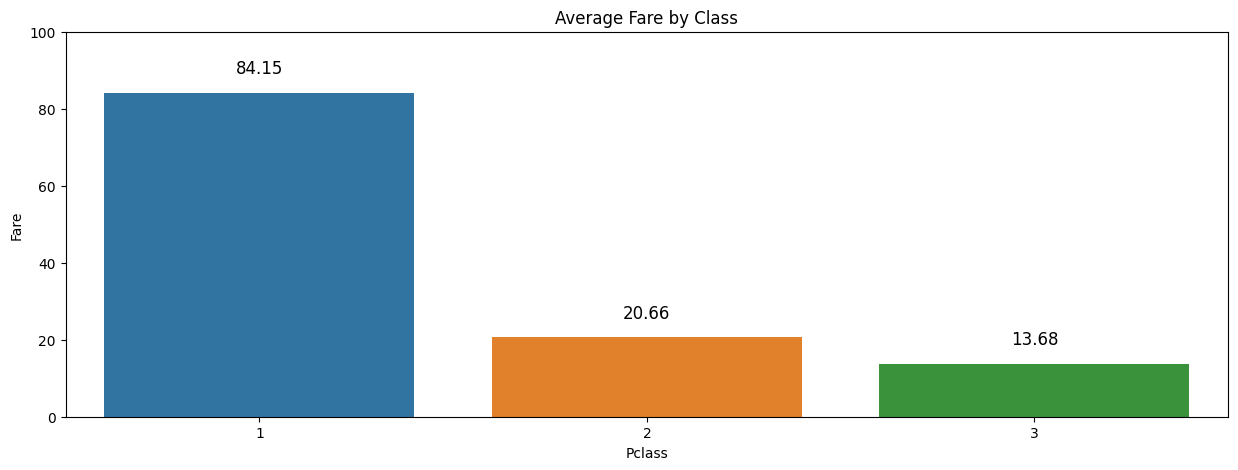

In [21]:
#  Find a way to put number labels on top of each bar. 

plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass,
            x='Pclass',
            y='Fare')
plt.title('Average Fare by Class')

for i in range(mean_fare_by_pclass.shape[0]):
    plt.text(x=i,
             y=mean_fare_by_pclass.loc[i, 'Fare'] + 5,
             s=round(mean_fare_by_pclass.loc[i, 'Fare'], 2),
             ha='center',
             fontsize='large')
    
plt.ylim(0, 100)    
plt.show()

We can also add a **reference line** using `plt.axhline` or `plt.axvline` to highlight any threshold or comparision if any. 

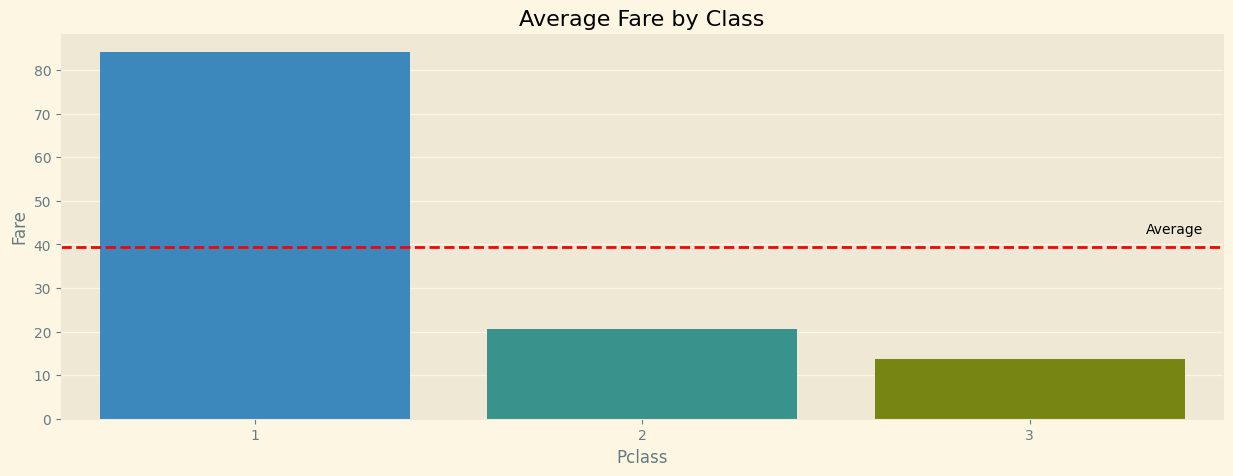

In [24]:
plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass,
            x='Pclass',
            y='Fare')
plt.title('Average Fare by Class')
plt.axhline(y=mean_fare_by_pclass['Fare'].mean(), 
            color='red', 
            linestyle='--')
plt.text(x=2.3,
         y=mean_fare_by_pclass['Fare'].mean()+3,
         s='Average')
plt.show()

## 4.  Styling and Export

Matplotlib also offers a wide range of visualization color palettes to improve the aesthetic of your visualization. You can refer to this link for available themes: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

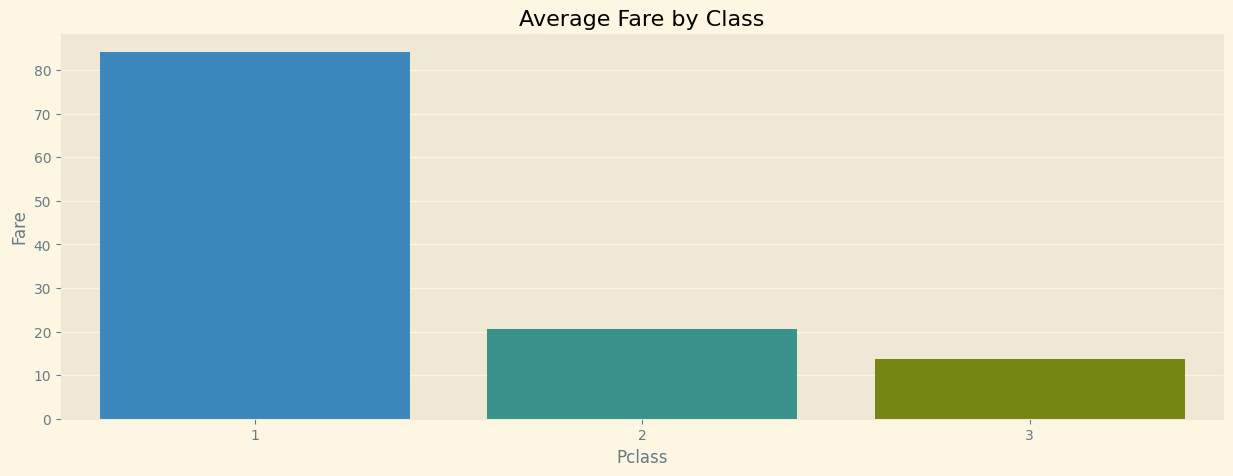

In [23]:
# Set up the theme
plt.style.use('Solarize_Light2')

# Visualize 
plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass,
            x='Pclass',
            y='Fare')
plt.title('Average Fare by Class')
plt.show()

We can use the `figure.Figure.savefig()` in order to save the figure to disk. Note that there are several useful flags we'll show below:

* `transparent=True` makes the background of the saved figure transparent if the format supports it.
* `dpi=80` controls the resolution (dots per square inch) of the output.
* `bbox_inches="tight"` fits the bounds of the figure to our plot.

Read more at: https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.savefig.html

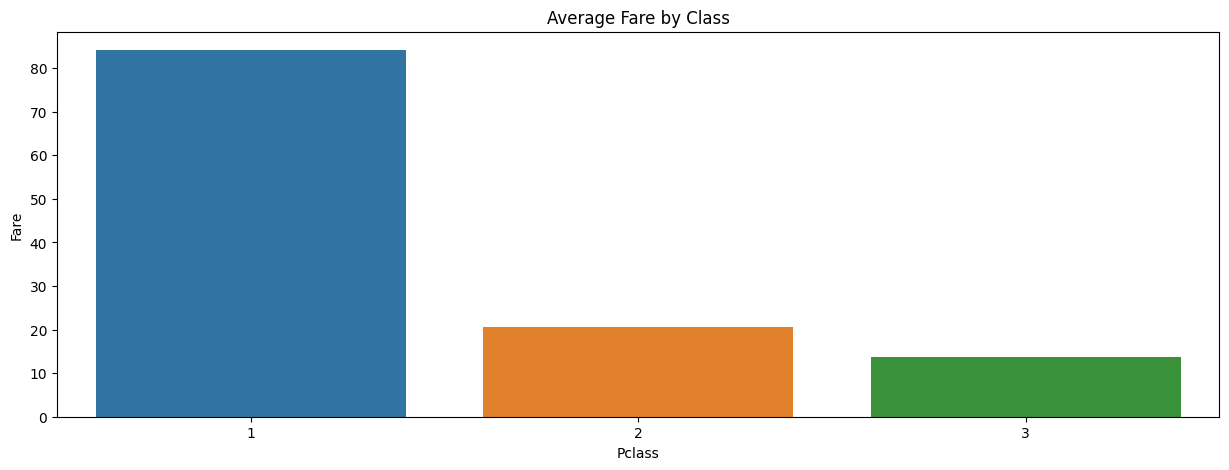

In [22]:
# Visualize 
fig = plt.figure(figsize=(15, 5))
sns.barplot(data=mean_fare_by_pclass,
            x='Pclass',
            y='Fare')
plt.title('Average Fare by Class')
plt.show()

In [25]:
# Save the figure

fig.savefig('fare.png', 
            transparent=False, 
            dpi=80, 
            bbox_inches="tight")

## SUMMARY 

```python
# --------- Import ---------
import matplotlib.pyplot as plt

# --------- Create figure and subplot ---------
plt.figure(figsize=(10, 15))
plt.subplot(121)

# --------- Shared axis ---------
plt.twinx()
plt.twiny()

# --------- Add title --------- 
plt.suptitle()
plt.title()

# --------- Format axis ---------
plt.xlabel()
plt.ylabel()

plt.xticks()
plt.yticks()

plt.xlim()
plt.ylim()

# --------- Add text ---------
plt.text()

# --------- Add reference line ---------
plt.axhline()
plt.axvline()

# --------- Change theme ---------
plt.style.use()

# --------- Export ---------
fig = plt.figure()
...
fig.savefig('test.png')
```